In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std



plt.rc("axes.spines", top=False, right=False)

#import our scripts that do data science workflow
import wrangle
import split_scale

In [2]:
from env import host, user, password

Accuire

In [36]:
df=wrangle.get_data_from_mysql()
df=df.drop('id', axis = 1)
df=df.drop('propertylandusetypeid', axis= 1)
df = df.drop('propertylandusedesc', axis =1)
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "squarefeet", 'taxvaluedollarcnt':'tax'})

In [37]:
df= pd.DataFrame(df)

In [48]:
df.shape

(16035, 4)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 4 columns):
bedrooms      16035 non-null float64
bathrooms     16035 non-null float64
tax           16033 non-null float64
squarefeet    16035 non-null float64
dtypes: float64(4)
memory usage: 501.2 KB


Distributions

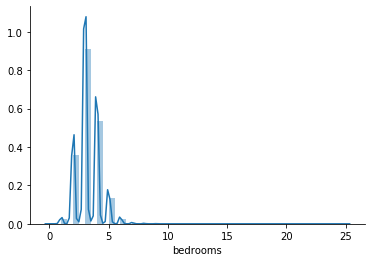

In [40]:
sns.distplot(df['bedrooms'])

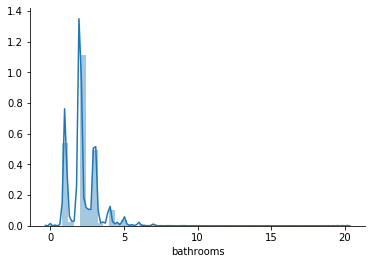

In [41]:
sns.distplot(df['bathrooms'])

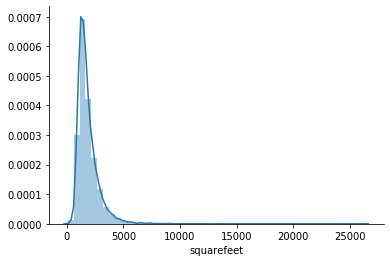

In [42]:
sns.distplot(df['squarefeet'])

Split

In [43]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=.8, random_state=123)
scaler, train_scaled, test_scaled = split_scale.standard_scaler(train,test)


X_train = train.drop(columns='tax')
y_train = train[['tax']]
X_test = test.drop(columns='tax')
y_test = test[['tax']]

In [50]:
df.columns.values

array(['bedrooms', 'bathrooms', 'tax', 'squarefeet'], dtype=object)

In [51]:
df.isnull().sum()

bedrooms      0
bathrooms     0
tax           2
squarefeet    0
dtype: int64

In [53]:
df= df.dropna(axis=0)

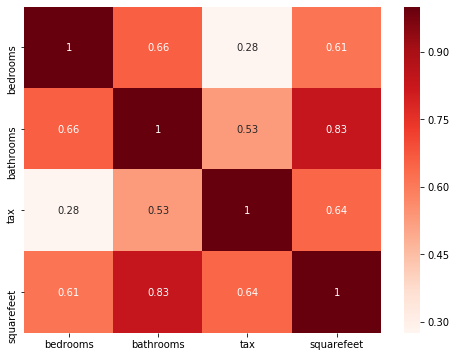

In [45]:
plt.figure(figsize=(8,6))
cor = train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

SCaler


In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer

In [57]:
# create scaler object
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
# fit the object: 
scaler = scaler.fit(train)
# transform:
scaled_train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])

In [58]:
scaled_train.describe()

,bedrooms,bathrooms,tax,squarefeet
count,12828.000000,12828.000000,12827.000000,12828.000000
mean,0.129679,0.110103,0.023707,0.117630
std,0.038594,0.050831,0.031995,0.068616
min,0.000000,0.000000,0.000000,0.000000
25%,0.120000,0.100000,0.009255,0.075448
50%,0.120000,0.100000,0.016385,0.100550
75%,0.160000,0.150000,0.027415,0.140336
max,1.000000,1.000000,1.000000,1.000000


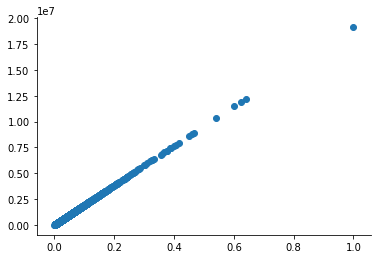

In [59]:
plt.scatter(scaled_train.tax, train.tax)

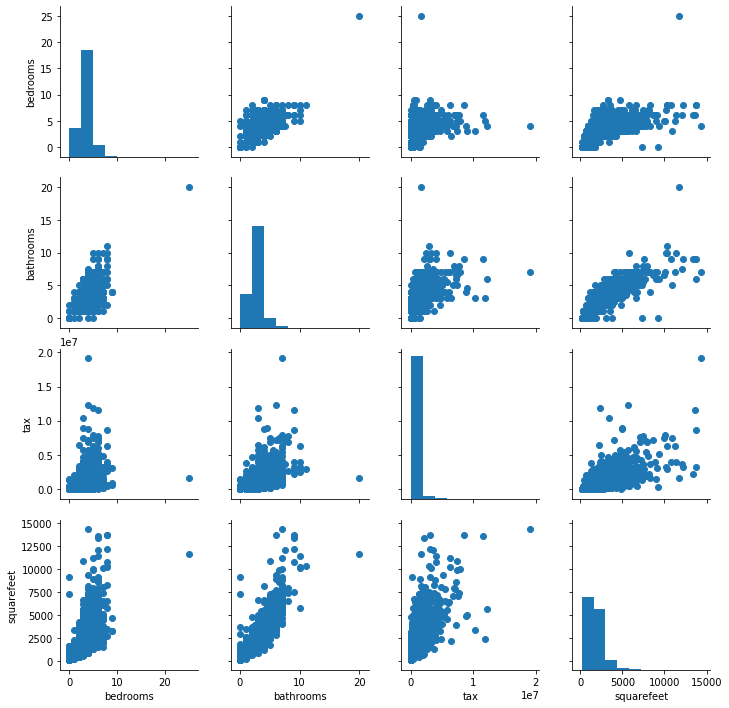

In [60]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

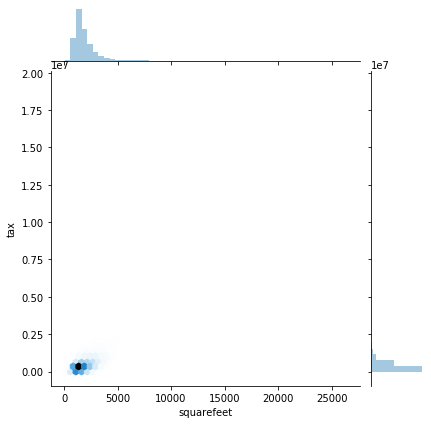